## Landmark detection model

#### Shrita Gaonkar(100799307)

#### AIDI 2000 - Applied Machine Learning - Assignment Part B





### Build a Facial landmark detection model that could go into the pipeline for a facial recognition system

Description of the data:
    
There are 15 keypoints, which represent the following elements of the face:

left_eye_center, right_eye_center, left_eye_inner_corner, left_eye_outer_corner, right_eye_inner_corner, right_eye_outer_corner, left_eyebrow_inner_end, left_eyebrow_outer_end, right_eyebrow_inner_end, right_eyebrow_outer_end, nose_tip, mouth_left_corner, mouth_right_corner, mouth_center_top_lip, mouth_center_bottom_lip

Left and right here refers to the point of view of the subject.

The input image is given in the last field of the data files, and consists of a list of pixels (ordered by row), as integers in (0,255). The images are 96x96 pixels.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from sklearn.model_selection import train_test_split
from keras.models import load_model

Using TensorFlow backend.


In [2]:
df = pd.read_csv("data.csv")

### Handling missing values

In [3]:
# Looking at the shape of the data
df.shape

(7049, 30)

In [4]:
# Calculating the sum of missing values in each column
df.isna().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [5]:
# Dropping the missing values and 
df = df.dropna()
df.isna().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
dtype: int64

### Plotting images from .npz file and keypoints from df

In [6]:
# Processing the images, Opening the images in .npz format and then plotting the image
images = np.load('face_images.npz')
image = images['face_images']
# Moving the axes of an array to new positions.
final_image = np.moveaxis(image,-1,0)
# Converting the index of the dataset to list just to get the pointers
df_index_to_list = df.index.tolist()
view_image = final_image[df_index_to_list]

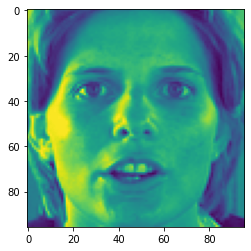

In [7]:
# For plotting the 32nd image of the dataset to study how the image looks like
plt.imshow(view_image[31])
plt.show()

### Splitting X and Y

In [8]:
# Splitting X and y sets
X = view_image/255.0
Y = df.values/96

### Displaying the images and their respective keypoints

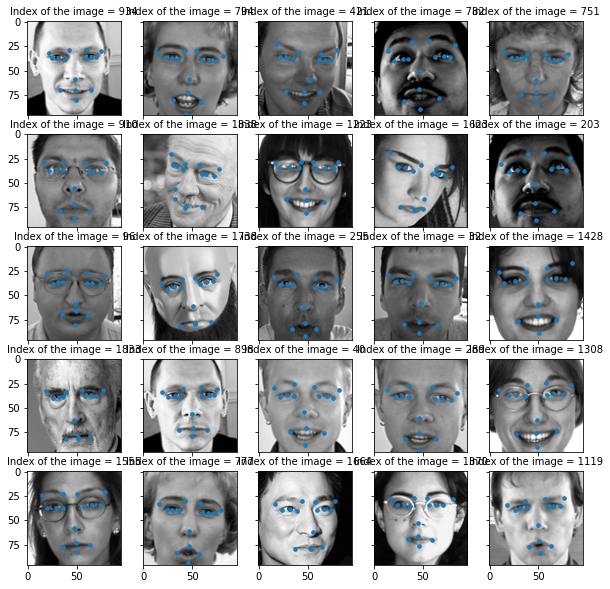

In [9]:
#For Randomly displaying some faces from the training data.
import matplotlib.pyplot as plt
n = 0
r = 5
c = 5
#Randomnly selecting the images from the dataset
irand=np.random.choice(Y.shape[0],r*c)
fig, ax = plt.subplots(r,c,sharex=True,sharey=True,figsize=[c*2,r*2])
for row in range(r):
    for col in range(c):
        ax[row,col].imshow(X[irand[n]], cmap='gray')
        #For being able to see the points we use scatter plots to plot the keypoints
        ax[row,col].scatter(Y[irand[n],0::2]*96,Y[irand[n],1::2]*96,marker='.',s=50)
        ax[row,col].set_title('Index of the image = %d' %(irand[n]),fontsize=10)
        n += 1

In [10]:
X.shape

(2140, 96, 96)

In [11]:
Y.shape

(2140, 30)

In [12]:
df.values.shape

(2140, 30)

### Splitting X and y train and test data

In [13]:
# Spltting X and Y into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state= 1)

In [14]:
# For expanding the shape pf an array I have used expand_dims from the numpy library
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

### Creating the CNN model from scratch for building the landmark detection

In [15]:
#Input Layer
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = 'same', activation='relu', kernel_initializer="he_normal", input_shape=(96, 96, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Hidden Layer
model.add(Conv2D(64, (3, 3), padding = 'same', activation='relu', kernel_initializer="he_normal"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#Output Layer
model.add(Flatten())
model.add(Dense(256, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(128, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(30))

In [16]:
#For summarising the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               9437440   
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [17]:
#Compiling the model, I tried SGD and adam but adam performed better
model.compile(optimizer= 'adam', loss='mean_squared_error', metrics=['accuracy'])
# Fitting the model to the train and test data
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=100, batch_size=20)

Train on 1369 samples, validate on 343 samples
Epoch 1/100
1369/1369 [==============================] - 20s 15ms/step - loss: 2.3909 - accuracy: 0.1753 - val_loss: 0.0136 - val_accuracy: 0.4111
Epoch 2/100
1369/1369 [==============================] - 20s 14ms/step - loss: 0.0108 - accuracy: 0.5383 - val_loss: 0.0090 - val_accuracy: 0.4490
Epoch 3/100
1369/1369 [==============================] - 19s 14ms/step - loss: 0.0063 - accuracy: 0.5712 - val_loss: 0.0040 - val_accuracy: 0.5452
Epoch 4/100
1369/1369 [==============================] - 19s 14ms/step - loss: 0.0028 - accuracy: 0.6202 - val_loss: 0.0026 - val_accuracy: 0.5831
Epoch 5/100
1369/1369 [==============================] - 19s 14ms/step - loss: 0.0016 - accuracy: 0.6180 - val_loss: 0.0018 - val_accuracy: 0.6297
Epoch 6/100
1369/1369 [==============================] - 20s 14ms/step - loss: 0.0013 - accuracy: 0.6596 - val_loss: 0.0018 - val_accuracy: 0.6356
Epoch 7/100
1369/1369 [==============================] - 21s 16ms/step 

1369/1369 [==============================] - 19s 14ms/step - loss: 2.3329e-04 - accuracy: 0.8240 - val_loss: 8.4394e-04 - val_accuracy: 0.7259
Epoch 55/100
1369/1369 [==============================] - 19s 14ms/step - loss: 2.4910e-04 - accuracy: 0.8335 - val_loss: 8.3088e-04 - val_accuracy: 0.7347
Epoch 56/100
1369/1369 [==============================] - 19s 14ms/step - loss: 2.3855e-04 - accuracy: 0.8444 - val_loss: 8.5606e-04 - val_accuracy: 0.7201
Epoch 57/100
1369/1369 [==============================] - 20s 14ms/step - loss: 2.3475e-04 - accuracy: 0.8327 - val_loss: 8.2564e-04 - val_accuracy: 0.7201
Epoch 58/100
1369/1369 [==============================] - 19s 14ms/step - loss: 2.1635e-04 - accuracy: 0.8444 - val_loss: 8.1270e-04 - val_accuracy: 0.7230
Epoch 59/100
1369/1369 [==============================] - 19s 14ms/step - loss: 2.2118e-04 - accuracy: 0.8386 - val_loss: 0.0011 - val_accuracy: 0.7026
Epoch 60/100
1369/1369 [==============================] - 19s 14ms/step - loss: 2

### Evaluating the model

In [18]:
# For calculating the accuracy of the built model and evaluating it
mse, acc = model.evaluate(X_test, y_test, verbose = 1)
print("The mean squared error of the data is", mse)
print("The accuracy of the data is", (acc*100))


428/428 [==============================] - 1s 3ms/step
The mean squared error of the data is 0.0008680175273966427
The accuracy of the data is 72.42990732192993


### Predicting using the model

In [19]:
# Predicting the values for train and test using the model 
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

### Visualising the model predictions and actual keypoints from the data

Text(0.5, 0.98, 'circle is for actual and star is for predicted')

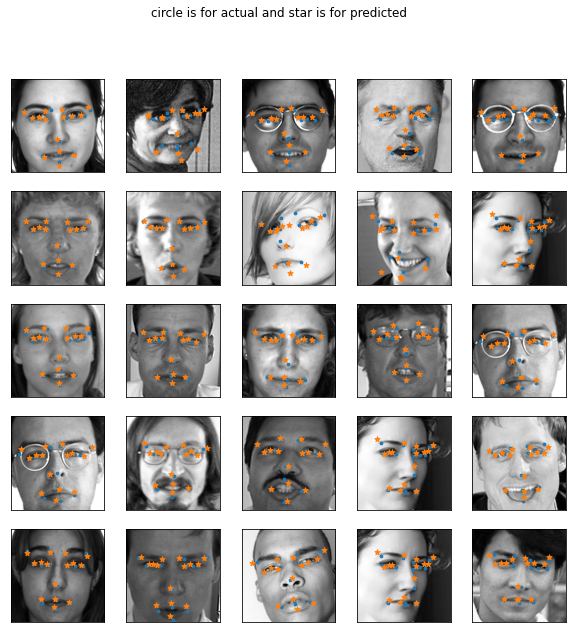

In [20]:
# Here, I want to look at the model annotations on the randomly selected five images

n = 0
r = 5
c = 5
irand=np.random.choice(y_test.shape[0],r*c)

fig, ax = plt.subplots(r,c,sharex=True,sharey=True,figsize=[c*2,r*2])

for row in range(r):
    for col in range(c):
        
        ax[row,col].imshow(X_test[irand[n]].squeeze(-1), cmap='gray')
        # The markings in circle are actual and the markings in star are predicted/annotated by the model
        ax[row,col].scatter(y_test[irand[n],0::2]*96,y_test[irand[n],1::2]*96,marker='.',s=30)
        ax[row,col].scatter(test_pred[irand[n],0::2]*96,test_pred[irand[n],1::2]*96,marker='*',s=30)
        ax[row,col].set_xticks(())
        ax[row,col].set_yticks(())
        n += 1
        
        
plt.suptitle("circle is for actual and star is for predicted")